Evaluation

In [2]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from bert_score import score
from rouge_score import rouge_scorer
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

c:\Users\kaspr\Documents\Studia\IAD2\NLP-RAG\nlp_rag_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("data\homer_odyssey_eval_results.csv", sep=";")

In [4]:
def compute_metrics(data):
    bleu_scores = []
    bert_precision_scores = []
    bert_recall_scores = []
    bert_f1_scores = []
    rouge_1_scores = []
    rouge_2_scores = []
    rouge_l_scores = []

    rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for _, row in tqdm(data.iterrows()):
        reference = [row["Answer"].split()]
        candidate = row["RAG_output"].split()
        
        bleu = sentence_bleu(reference, candidate)
        bleu_scores.append(bleu)


        rouge_scores = rouge.score(row["Answer"], row["RAG_output"])
        rouge_1_scores.append(rouge_scores['rouge1'].fmeasure)
        rouge_2_scores.append(rouge_scores['rouge2'].fmeasure)
        rouge_l_scores.append(rouge_scores['rougeL'].fmeasure)
    
    bert_p, bert_r, bert_f1 = score(
        data["RAG_output"].tolist(),
        data["Answer"].tolist(),
        lang="en",
        verbose=True
    )
    
    bert_precision_scores = bert_p.tolist()
    bert_recall_scores = bert_r.tolist()
    bert_f1_scores = bert_f1.tolist()
    
    data["BLEU"] = bleu_scores
    data["ROUGE-1"] = rouge_1_scores
    data["ROUGE-2"] = rouge_2_scores
    data["ROUGE-L"] = rouge_l_scores
    data["BERT_Precision"] = bert_precision_scores
    data["BERT_Recall"] = bert_recall_scores
    data["BERT_F1"] = bert_f1_scores

    return data

In [5]:
data_with_metrics = compute_metrics(data)

0it [00:00, ?it/s]c:\Users\kaspr\Documents\Studia\IAD2\NLP-RAG\nlp_rag_venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\kaspr\Documents\Studia\IAD2\NLP-RAG\nlp_rag_venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\kaspr\Documents\Studia\IAD2\NLP-RAG\nlp_rag_venv\Lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how m

calculating scores...
computing bert embedding.


100%|██████████| 2/2 [00:21<00:00, 10.90s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 45.20it/s]

done in 21.83 seconds, 2.02 sentences/sec


In [6]:
data_with_metrics.to_csv("output_with_metrics.csv", index=False)

In [7]:
data_with_metrics = pd.read_csv("output_with_metrics.csv")
data_with_metrics.head(5)

,Question,Answer,Book and Passage,RAG_output,RAG_passages,BLEU,ROUGE-1,ROUGE-2,ROUGE-L,BERT_Precision,BERT_Recall,BERT_F1
0,What does Odysseus tell Polyphemus his name is?,Odysseus tells Polyphemus his name is 'Nobody'...,"""Book 9""",The passage does not mention Odysseus telling...,"He began with his victory over the Cicons, and...",3.138916e-155,0.229508,0.135593,0.229508,0.848565,0.883487,0.865674
1,How do Odysseus and his men escape the Cyclops...,They escape by hiding under the bellies of sheep.,"""Book 9""","To escape the Cyclops' cave, Odysseus cleverl...","“As he spoke he drove the ram outside, but whe...",2.968603e-155,0.166667,0.034483,0.133333,0.816442,0.882270,0.848080
2,What happens when Odysseus taunts Polyphemus a...,Polyphemus throws boulders and prays to Poseid...,"""Book 9""",After Odysseus and his crew escape from Polyp...,"Now all the rest, as many as fled from sheer d...",3.285300e-155,0.193548,0.066667,0.161290,0.848917,0.864242,0.856511
3,What effect does the lotus plant have on Odyss...,The lotus plant makes them forget their desire...,"""Book 9""",The lotus plant causes Odysseus's men to beco...,When the bright star that heralds the approach...,1.511408e-78,0.264151,0.156863,0.226415,0.867125,0.920502,0.893017
4,How does Circe transform Odysseus's men?,Circe turns them into swine with a potion.,"""Book 10""","In the passages, there is no mention of Circe...","He began with his victory over the Cicons, and...",1.000369e-231,0.148148,0.000000,0.148148,0.833977,0.866797,0.850070


In [8]:
metrics = ["BLEU", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BERT_Precision", "BERT_Recall", "BERT_F1"]

In [9]:
mean_values = data_with_metrics[metrics].mean()
median_values = data_with_metrics[metrics].median()
std_values = data_with_metrics[metrics].std()

# Tworzymy nowy DataFrame z metrykami
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values
})

# Wyświetl wynikowy DataFrame
print(metrics_df)

                        Metric      Mean         Median  Standard Deviation
BLEU                      BLEU  0.008667  1.811353e-155            0.032798
ROUGE-1                ROUGE-1  0.168894   1.498316e-01            0.101888
ROUGE-2                ROUGE-2  0.060707   3.724138e-02            0.080910
ROUGE-L                ROUGE-L  0.145405   1.272864e-01            0.089545
BERT_Precision  BERT_Precision  0.836556   8.355122e-01            0.023842
BERT_Recall        BERT_Recall  0.894750   8.917512e-01            0.023182
BERT_F1                BERT_F1  0.864550   8.598634e-01            0.021077


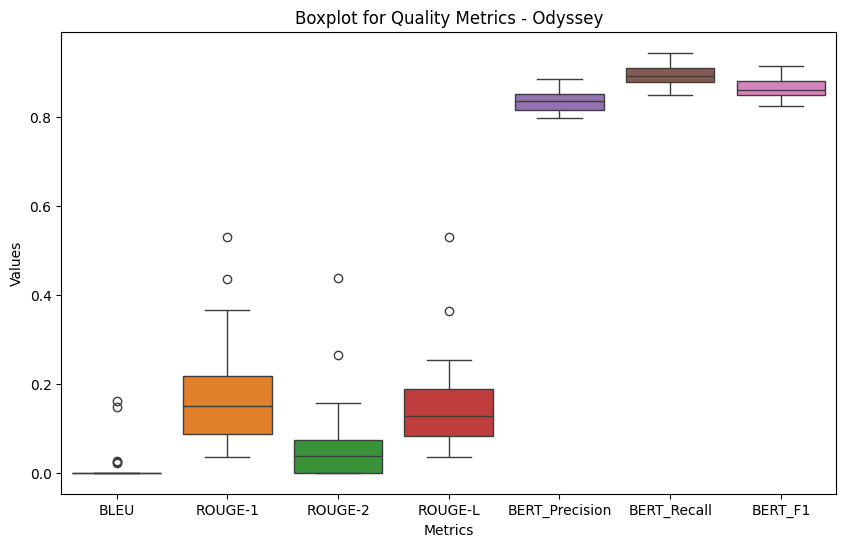

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_with_metrics[metrics])
plt.title('Boxplot for Quality Metrics - Odyssey')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

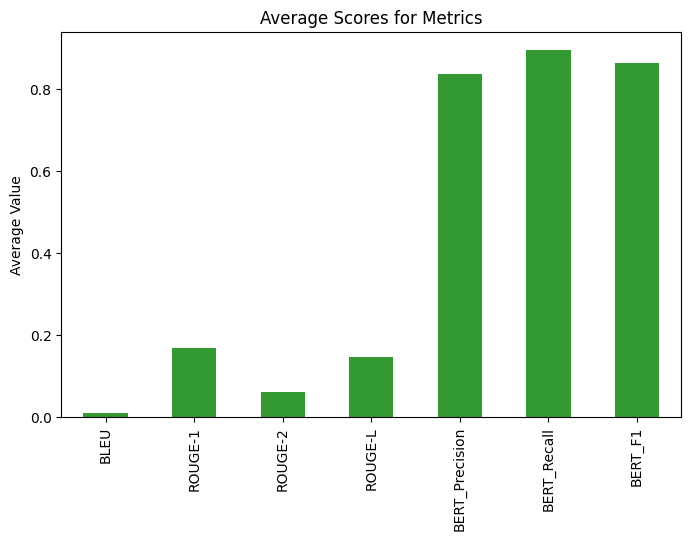

In [11]:
mean_scores = data_with_metrics[metrics].mean()
plt.figure(figsize=(8, 5))
mean_scores.plot(kind='bar', color='green', alpha=0.8)
plt.title('Average Scores for Metrics')
plt.ylabel('Average Value')
plt.show()

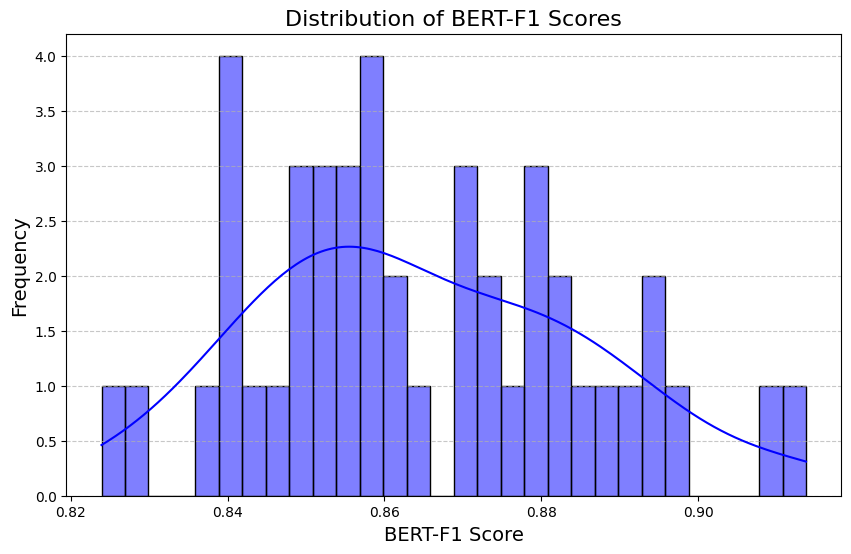

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data_with_metrics['BERT_F1'], kde=True, bins=30, color='blue')
plt.title('Distribution of BERT-F1 Scores', fontsize=16)
plt.xlabel('BERT-F1 Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('bert_f1_distribution_odyssey.png')
plt.show()

In [13]:
low_threshold = data_with_metrics['BERT_F1'].quantile(0.33)
high_threshold = data_with_metrics['BERT_F1'].quantile(0.67)

In [14]:
data_with_metrics['Category'] = np.where(data_with_metrics['BERT_F1'] <= low_threshold, 'Low',
                            np.where(data_with_metrics['BERT_F1'] >= high_threshold, 'High', 'Medium'))

In [15]:
random_samples = data_with_metrics.groupby('Category').apply(lambda x: x.sample(5, random_state=42))
random_samples.reset_index(drop=True, inplace=True)

C:\Users\kaspr\AppData\Local\Temp\ipykernel_23316\3500796642.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = data_with_metrics.groupby('Category').apply(lambda x: x.sample(5, random_state=42))


In [16]:
random_samples.to_csv('data/random_samples.csv', index=False)

In [17]:
highest_scores = data_with_metrics.nlargest(5, 'BERT_F1')[['Question', 'Answer', 'RAG_output', 'BERT_F1']]
lowest_scores = data_with_metrics.nsmallest(5, 'BERT_F1')[['Question', 'Answer', 'RAG_output', 'BERT_F1']]

highest_scores.to_csv('data/highest_scores_examples.csv', index=False)
lowest_scores.to_csv('data/lowest_scores_examples.csv', index=False, sep=";")

In [18]:
highest_scores

,Question,Answer,RAG_output,BERT_F1
22,How does Nausicaa help Odysseus?,Nausicaa provides Odysseus with clothing and d...,Nausicaa helps Odysseus by getting him to her...,0.913776
11,How long does Odysseus stay on Calypso's island?,Odysseus stays on Calypso's island for seven y...,"According to Odysseus' account, he stayed on ...",0.910162
14,What contest does Penelope propose to the suit...,Penelope proposes a contest to string Odysseus...,"To win Penelope's hand in marriage, the suito...",0.897125
36,How does Odysseus handle the challenge of the ...,The Laestrygonians destroy all of Odysseus's s...,Odysseus escapes the Laestrygonians by cuttin...,0.894324
3,What effect does the lotus plant have on Odyss...,The lotus plant makes them forget their desire...,The lotus plant causes Odysseus's men to beco...,0.893017


In [20]:
lowest_scores

,Question,Answer,RAG_output,BERT_F1
43,How does Odysseus handle the suitors' families...,Athena intervenes to prevent further conflict ...,"Based on the provided passages, there is no m...",0.823925
6,What does Tiresias warn Odysseus about in the ...,Tiresias warns him not to harm the cattle of H...,The provided passages do not contain informat...,0.827162
29,What is the fate of the Phaeacian ship that br...,Poseidon turns the ship into stone as punishment.,The Phaeacian ship that brings Odysseus home ...,0.836470
27,What is the omen that confirms Odysseus's retu...,An eagle carrying a dead goose appears as an o...,"Based on the passage, the omen confirming Ody...",0.839751
40,What is the significance of the olive tree bed?,The bed is a symbol of Odysseus and Penelope's...,The significance of the olive tree bed is tha...,0.839778
